# Deep Q Network With PyTorch in Cart Pole Environment

In [70]:
import gymnasium as gym

from rlforge.experiments import ExperimentRunner
from rlforge.agents.semi_gradient import DQNTorchAgent

In [71]:
num_envs = 8
envs = gym.make_vec("CartPole-v1", num_envs=num_envs, vectorization_mode="async")

agent = DQNTorchAgent(
    state_dim=envs.observation_space.shape[1],
    action_dim=envs.action_space[0].n,
    network_architecture=(64,64),
    learning_rate=0.0003, 
    discount=0.99,
    temperature=0.1, 
    target_network_update_steps=10, 
    num_replay=4, 
    experience_buffer_size=50000, 
    mini_batch_size=512,
    device="cpu"
)


In [72]:
runner = ExperimentRunner(envs, agent)

results = runner.run_episodic_batch(
    num_runs=1,
    num_episodes=500,
    max_steps_per_episode=None
)

rewards = results["rewards"]

runner.summary(last_n=20)

Run 1/1 - Episodes:   0%|          | 0/500 [00:00<?, ?it/s]

 Experiment Summary (Episodic)
Runs: 1
Average runtime per run: 452.095 seconds
Episodes per run (Max): 500
First episode mean reward: 77.000
Last episode mean reward: 479.000
Overall mean reward: 325.980
Mean reward (last 20 episodes): 473.250
First episode mean steps: 77.0
Last episode mean steps: 480.0
Overall mean steps: 327.0


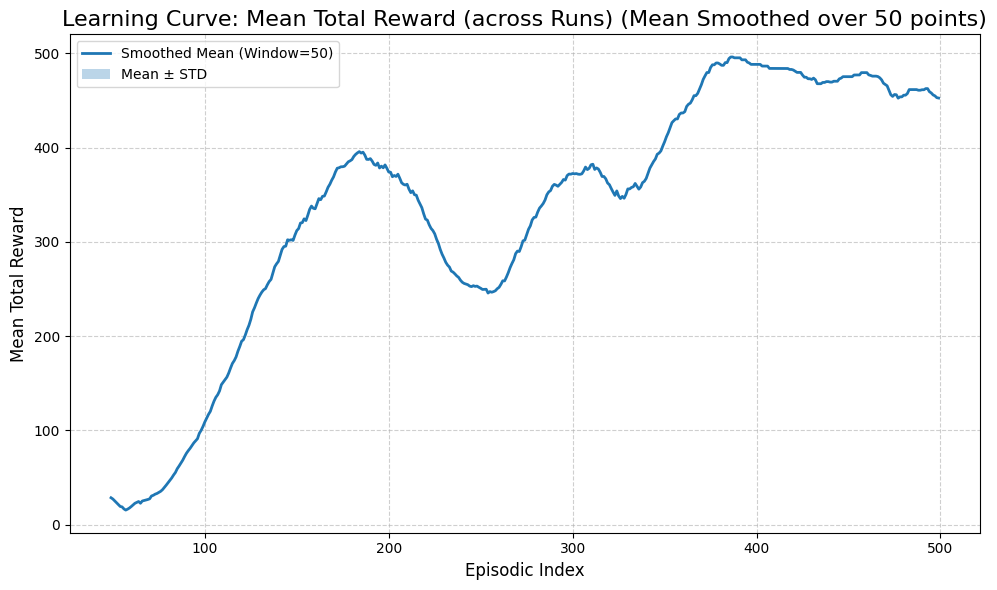

In [74]:
runner.plot_results()